In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.impute import SimpleImputer
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07a4b46d68>,
      dtype=object)

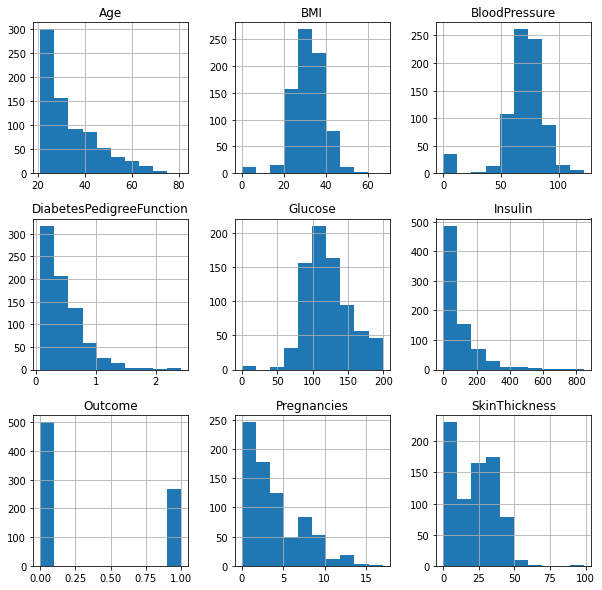

In [5]:
df.hist(figsize=(10,10))

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
x = df.iloc[:, :-1]  
y = df.iloc[:, -1] 

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [14]:
from keras.models import Sequential 
from keras.layers import Dense

In [15]:
model = Sequential([Dense(32, activation='relu', input_shape=(8,)),    Dense(32, activation='relu'),    Dense(1, activation='sigmoid'),])

In [16]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
17/17 [==============================] - 0s 11ms/step - loss: 0.6945 - accuracy: 0.5214 - val_loss: 0.6842 - val_accuracy: 0.5714
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.6164 - val_loss: 0.6720 - val_accuracy: 0.5974
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6499 - val_loss: 0.6622 - val_accuracy: 0.6407
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.6704 - val_loss: 0.6537 - val_accuracy: 0.6494
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.6816 - val_loss: 0.6462 - val_accuracy: 0.6710
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6369 - accuracy: 0.6927 - val_loss: 0.6395 - val_accuracy: 0.6797
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.6983 - val_loss: 0.6332 - val_accuracy: 0.6926
Epoch 8/100


In [19]:
model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7229


[0.524800717830658, 0.7229437232017517]

In [25]:
model_2 = Sequential([Dense(32, activation='relu', input_shape=(8,)),    Dense(32, activation='relu'),    Dense(1, activation='sigmoid'),])

In [26]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6765 - accuracy: 0.5363 - val_loss: 0.6149 - val_accuracy: 0.7186
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6081 - accuracy: 0.6983 - val_loss: 0.5732 - val_accuracy: 0.7143
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5620 - accuracy: 0.7393 - val_loss: 0.5459 - val_accuracy: 0.7532
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7561 - val_loss: 0.5274 - val_accuracy: 0.7619
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5062 - accuracy: 0.7672 - val_loss: 0.5143 - val_accuracy: 0.7619
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4875 - accuracy: 0.7747 - val_loss: 0.5099 - val_accuracy: 0.7532
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4747 - accuracy: 0.7784 - val_loss: 0.5072 - val_accuracy: 0.7619
Epoch 8/100
1

In [28]:
model_2.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.7359


[0.6302367448806763, 0.7359307408332825]

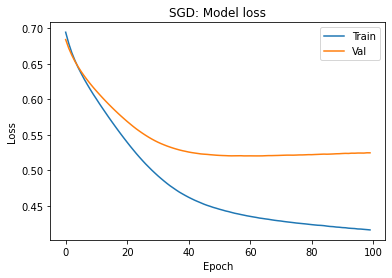

In [39]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('SGD: Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

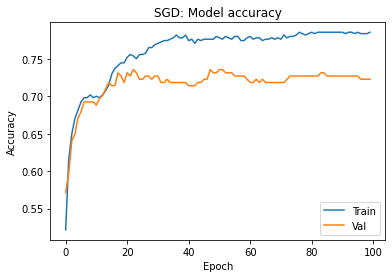

In [40]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('SGD: Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

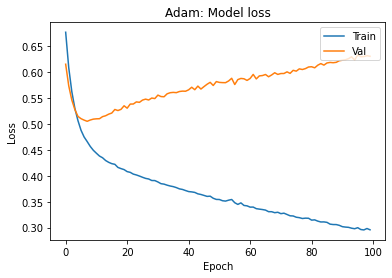

In [37]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Adam: Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

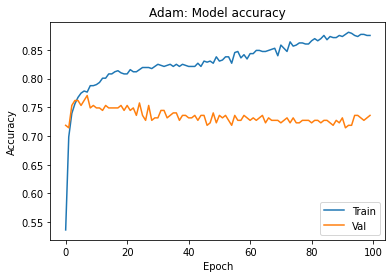

In [38]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Adam: Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

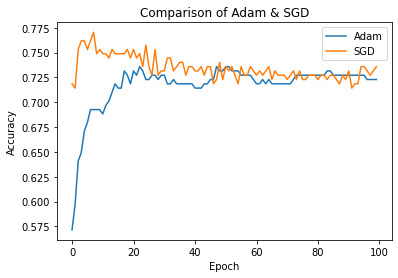

In [44]:
plt.plot(hist.history['val_accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Comparison of Adam & SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam', 'SGD'], loc='upper right')
plt.show()

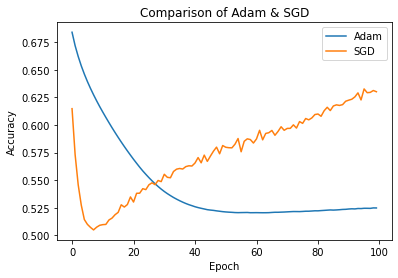

In [45]:
plt.plot(hist.history['val_loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Comparison of Adam & SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam', 'SGD'], loc='upper right')
plt.show()